# Práctica 4 de IA

# 2. Construcción de un clasificador en una base de datos real (3,5 puntos)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [ ]:
#df = pd.read_csv("pima.csv", header=0, sep=',')
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si un paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* **Pregnancies:** Number of times pregnant
* **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function
* **Age:** Age (years)
* **Class:** Class variable ("yes" / "no")

In [ ]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values
#print(X)
#print(y)

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [ ]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

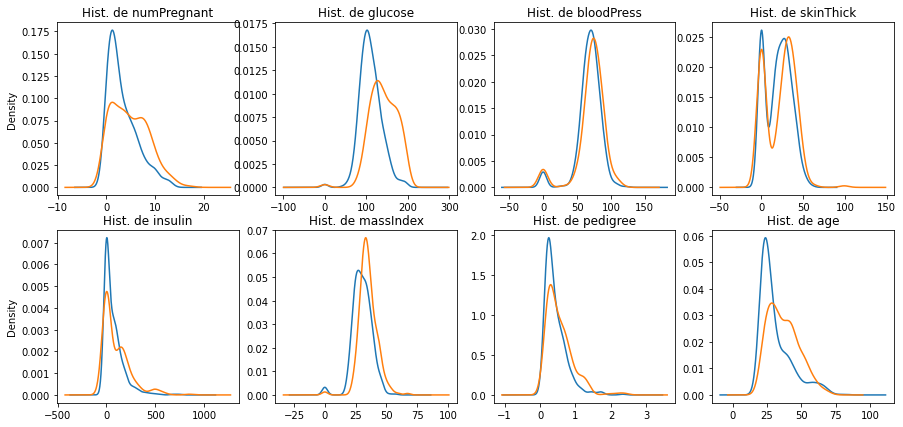

In [ ]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# otros clasificadores (del notebook p4_01)

clf = MLPClassifier(hidden_layer_sizes=(100,100,50,))
      # KNeighborsClassifier(n_neighbors=11) 
      # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=5)
print("Todos los scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Todos los scores:  [0.64935065 0.69480519 0.65584416 0.7254902  0.67973856]
Score global del modelo: 0.68 +/- 0.03


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?

  **El mejor score conseguido es 0.76 +/- 0.04 con un 'k' de valor 13**
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
 
 **El mejor score conseguido es 0.75 +/- 0.03 con un 'max_depth' de valor 5**

* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

  **El mejor score conseguido es 0.75 +/- 0.03 con un 'hidden_layer_sizes' de valor (100, 10,)**

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

## Mejora el modelo: procesamiento de los atributos y búsqueda de parámetros

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).

**Tras las pruebas realizadas, nos hemos dado cuenta de que los datos determinan el modelo a usar para la clasificación de los propios datos, ya que esperábamos que la red neuronal fuese la mejor opción pero no ha sido así.**

**Además, en las pruebas anteriores, comprobamos que la red neuronal no obtenía un score medio constante cuando se repetían las pruebas con el mismo dataset, por lo que llegamos a la conclusión anterior.**

**También hemos de decir que las pruebas que hemos realizado son las que creíamos más importantes, véase normalizar los datos y centrarlos. En los resultados obtenidos, se puede observar una ligera mejora de los scores.**

**En redes neuronales no es tan necesario normalizar los datos, ya que los parámetros de las neuronas, palían las diferencias de rangos de los datos de entrada. Pero en árboles de decisión y más aún en el algoritmo k-NN, pueden ser determinantes a la hora de clasificar.**

**No hemos tratado los missing values ni detectado los outliers, cosa que pueden aumentar un poco más los scores, ya que evitan tener casos extremos o raros y carencias en los datos, pero creemos que lo más eficaz es la normalización.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

X = df[nombres_atrs].values

scores = [[] for i in range(2)]
diccionario = {'KNN' : 0, 'DTree' : 1}
MLPDicc = {'1capa': [], '2capas': [], '3capas': []}

for k in range(1,101):
    # generamos el clasificador de knn vecinos
    clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf, X, y, cv=5)
    media = score.mean()
    scores[diccionario['KNN']].append(media)

    # generamos el clasificador de decision tree
    clf = DecisionTreeClassifier(max_depth=k)
    score = cross_val_score(clf, X, y, cv=5)
    media = score.mean()
    scores[diccionario['DTree']].append(media)

# generamos varios clasificadores MLP con varias capas y varias neuronas
for i in range(1,9):
  clf1 = MLPClassifier(hidden_layer_sizes=(25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['1capa'].append(media)
  
  clf2 = MLPClassifier(hidden_layer_sizes=(25*i, 25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['2capas'].append(media)

  clf3 = MLPClassifier(hidden_layer_sizes=(25*i, 25*i, 25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['3capas'].append(media)

mejorKnn = max(scores[diccionario['KNN']])
print(f"Score mejor del knn: {mejorKnn} con valor k = {scores[diccionario['KNN']].index(mejorKnn)+1}")

mejorDTree = max(scores[diccionario['DTree']])
print(f"Score mejor del DTree: {mejorDTree} con valor depth = {scores[diccionario['DTree']].index(mejorDTree)+1}")

mejorMLP1Capa = max(MLPDicc['1capa'])
numNeuronMLP1Capa = (MLPDicc['1capa'].index(mejorMLP1Capa)+1)*25

mejorMLP2Capas = max(MLPDicc['2capas'])
numNeuronMLP2Capas = (MLPDicc['2capas'].index(mejorMLP2Capas)+1)*25

mejorMLP3Capas = max(MLPDicc['3capas'])
numNeuronMLP3Capas = (MLPDicc['3capas'].index(mejorMLP3Capas)+1)*25

mejoresMLP = [mejorMLP1Capa, mejorMLP2Capas, mejorMLP3Capas]
numNeuronMLP = [numNeuronMLP1Capa, numNeuronMLP2Capas, numNeuronMLP3Capas]

mejorMLP = max(mejoresMLP)
indexMejorMLP = mejoresMLP.index(mejorMLP)

print(f"Score mejor de MLP: {mejorMLP} con {indexMejorMLP+1} capas de {numNeuronMLP[indexMejorMLP]} neuronas")


Score mejor del knn: 0.7578558696205755 con valor k = 14
Score mejor del DTree: 0.7513878278584161 con valor depth = 5
Score mejor de MLP: 0.725362872421696 con 2 capas de 175 neuronas


In [ ]:
# incluye aquí el código
"""
Normalización:
La escala de los datos es importante porque puede ocurrir que
características con valores muy grandes acaben convirtiendose
en el predictor principal
"""
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = df[nombres_atrs].values
X = sc_x.fit_transform(X)

scores = [[] for i in range(2)]
diccionario = {'KNN' : 0, 'DTree' : 1}
MLPDicc = {'1capa': [], '2capas': [], '3capas': []}

for k in range(1,101):
    # generamos el clasificador de knn vecinos
    clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf, X, y, cv=5)
    media = score.mean()
    scores[diccionario['KNN']].append(media)

    # generamos el clasificador de decision tree
    clf = DecisionTreeClassifier(max_depth=k)
    score = cross_val_score(clf, X, y, cv=5)
    media = score.mean()
    scores[diccionario['DTree']].append(media)

# generamos varios clasificadores MLP con varias capas y varias neuronas
for i in range(1,9):
  clf1 = MLPClassifier(hidden_layer_sizes=(25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['1capa'].append(media)
  
  clf2 = MLPClassifier(hidden_layer_sizes=(25*i, 25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['2capas'].append(media)

  clf3 = MLPClassifier(hidden_layer_sizes=(25*i, 25*i, 25*i,))
  score = cross_val_score(clf, X, y, cv=5)
  media = score.mean()
  MLPDicc['3capas'].append(media)

mejorKnn = max(scores[diccionario['KNN']])
print(f"Score mejor del knn: {mejorKnn} con valor k = {scores[diccionario['KNN']].index(mejorKnn)+1}")

mejorDTree = max(scores[diccionario['DTree']])
print(f"Score mejor del DTree: {mejorDTree} con valor depth = {scores[diccionario['DTree']].index(mejorDTree)+1}")

mejorMLP1Capa = max(MLPDicc['1capa'])
numNeuronMLP1Capa = (MLPDicc['1capa'].index(mejorMLP1Capa)+1)*25

mejorMLP2Capas = max(MLPDicc['2capas'])
numNeuronMLP2Capas = (MLPDicc['2capas'].index(mejorMLP2Capas)+1)*25

mejorMLP3Capas = max(MLPDicc['3capas'])
numNeuronMLP3Capas = (MLPDicc['3capas'].index(mejorMLP3Capas)+1)*25

mejoresMLP = [mejorMLP1Capa, mejorMLP2Capas, mejorMLP3Capas]
numNeuronMLP = [numNeuronMLP1Capa, numNeuronMLP2Capas, numNeuronMLP3Capas]

mejorMLP = max(mejoresMLP)
indexMejorMLP = mejoresMLP.index(mejorMLP)

print(f"Score mejor de MLP: {mejorMLP} con {indexMejorMLP+1} capas de {numNeuronMLP[indexMejorMLP]} neuronas")


Score mejor del knn: 0.7669892199303965 con valor k = 17
Score mejor del DTree: 0.746176046176046 con valor depth = 5
Score mejor de MLP: 0.7214922332569392 con 1 capas de 200 neuronas


¿Opinas que otra configuración de los hiper-parámetros de los clasificadores utilizados puede resolver el problema más eficientemente? 
Es lo más probable. 

Prueba ahora a cambiar el valor de los hiper-parámetros y a devolver como clasificador final el que minimize la estimación del error de generalización. Para ello hay que hacer dos cosas. La primera, cambiar el modo en el que estimamos el error de generalización. Si basamos nuestro resultado en el error proporcionado por el test, haremos overfitting en el conjunto de test. Por ello debemos cambiar esta estimación. Estimaremos el error de generalización de cada clasificador usando Nested Cross Validation. 
Por otro lado, haremos una búsqueda en rejilla de los hiper-parámetros óptimos. Devolveremos el valor de los hiper-parámetros que optimize esa estimación del error. 

Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html a este problema y al espacio de hiper-parámetros de uno de los clasificadores. 
Recuerda que en https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier y en https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier tienes información sobre cada uno de los hiper-parámetros. Eres libre de elegir los valores y los hiper-parámetros que consideres. Antes de configurar la rejilla, lee un poco sobre cada uno de los hiper-parámetros para asegurarte que tiene sentido tu búsqueda.

Average difference of 0.004818 with std. dev. of 0.003716.


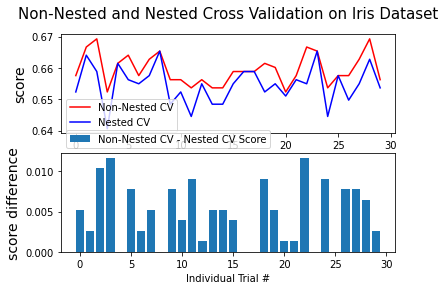

In [3]:
# incluye aquí código sobre este apartado
"""hiperparametros
Al entrenar un modelo de aprendizaje automático se fijan los valores de los hiperparámetros
para que con estos se obtengan los parámetros.

Algunos ejemplos de hiperparámetros utilizados para entrenar los modelos son:

  La ratio de aprendizaje en el algoritmo del descenso del gradiente.
  El número de vecinos en k-vecinos más cercanos (k-nn).
  La profundidad máxima en un árbol de decisión
"""
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
import pandas as pd

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
df = pd.read_csv("pima.csv", header=0, sep=',')
df.head(5)
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
X = df[nombres_atrs].values
y = df['class'].values

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()